In [99]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import filters, morphology
from aicsimageio import AICSImage

In [100]:
# file_name = f"/Users/demir/Documents/Hva_AI/afstudeerproject/Images Carolina/20240312_CKR_Exp35_STHdhQ97HA_96h_+BafA_CCT1_635P_HA_580_A11_460L_1.lif"
# file_name = f"/Users/demir/Documents/Hva_AI/afstudeerproject/codes_yunus/8hr_BTZ_image1.tif" # van internet
file_name = f"/Users/demir/Documents/Hva_AI/afstudeerproject/Images Carolina/20240312_CKR_Exp35_STHdhQ97HA_96h_+MG132_CCT1_635P_HA_580_A11_460L_3.lif"

img = AICSImage(file_name)
# img.dims.order  # T, C, Z, big Y, big X, (S optional)
img.dask_data  # Dask chunks fall on tile boundaries, pull YX chunks out of the image


dask.array<transpose, shape=(1, 4, 11, 1024, 1024), dtype=uint16, chunksize=(1, 1, 11, 1024, 1024), chunktype=numpy.ndarray>

In [101]:
print(img.dims.order)
print(img.shape)  # Tuple olarak boyutları
print(img.dask_data)

TCZYX
(1, 4, 11, 1024, 1024)
dask.array<transpose, shape=(1, 4, 11, 1024, 1024), dtype=uint16, chunksize=(1, 1, 11, 1024, 1024), chunktype=numpy.ndarray>


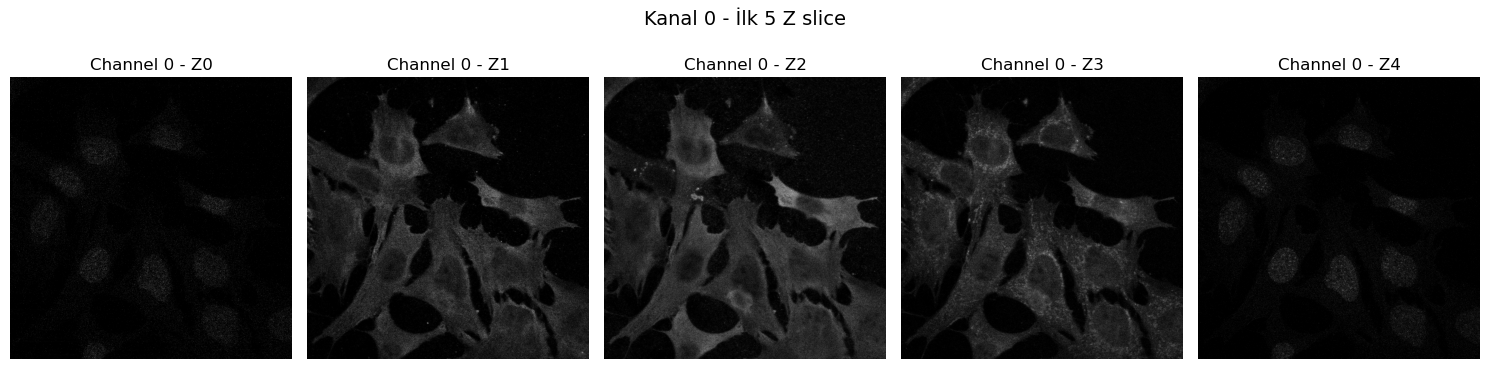

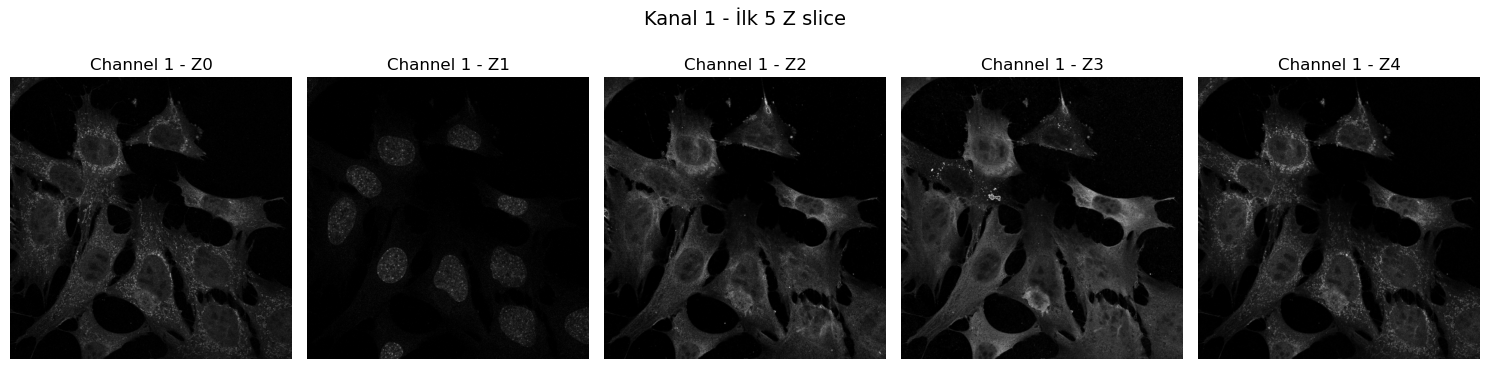

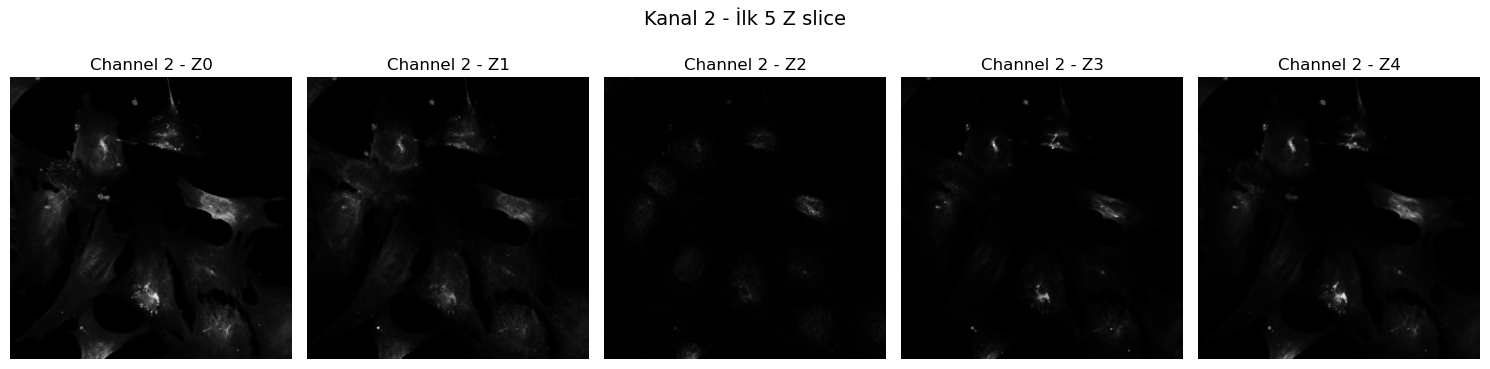

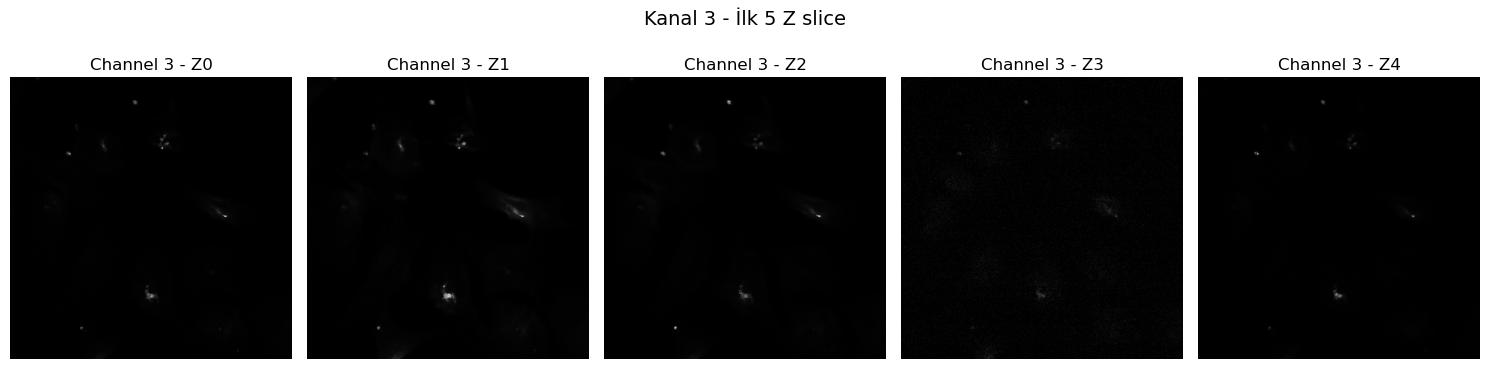

In [102]:
for c in range(img.dims.C):
    z_stack = img.get_image_data("ZYX", T=0, C=c)
    fig, axs = plt.subplots(1, min(5, img.dims.Z), figsize=(15, 4))  # İlk 5 Z slice
    for i in range(min(5, img.dims.Z)):
        axs[i].imshow(z_stack[i], cmap="gray")
        axs[i].set_title(f"Channel {c} - Z{i}")
        axs[i].axis("off")
    plt.suptitle(f"Kanal {c} - İlk {min(5, img.dims.Z)} Z slice", fontsize=14)
    plt.tight_layout()
    plt.show()

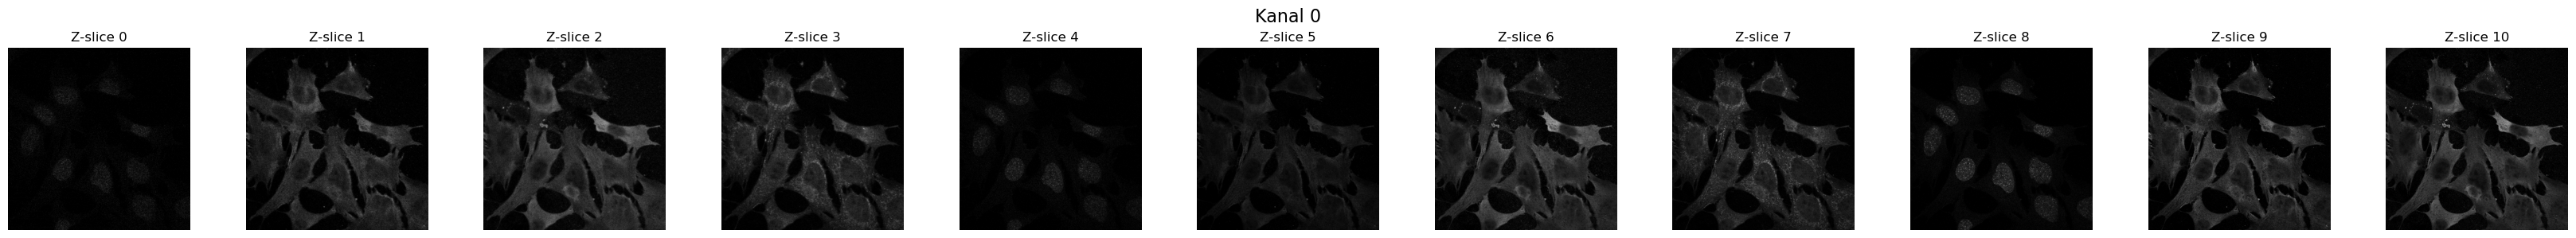

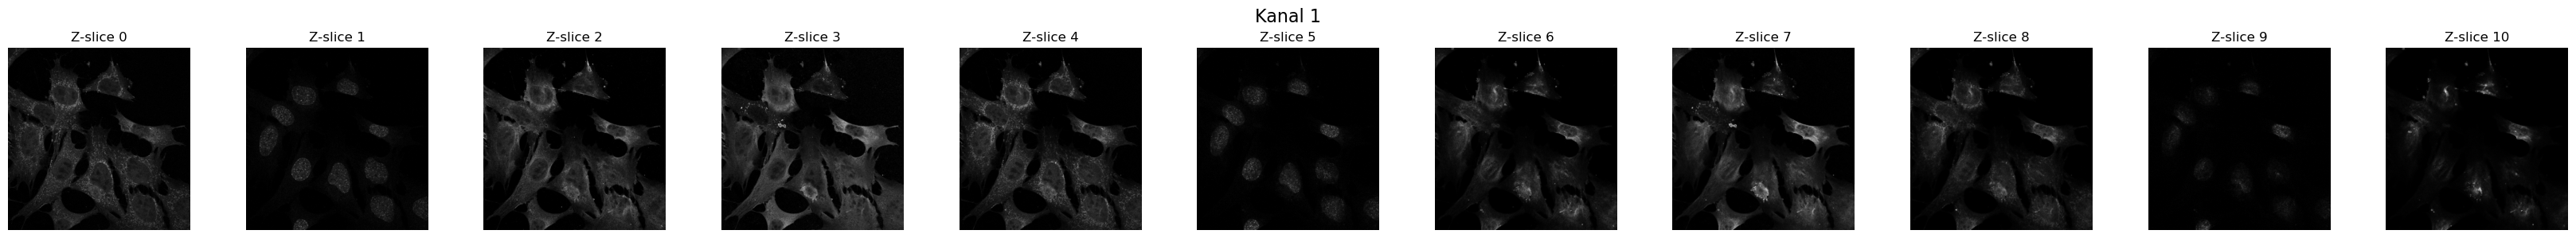

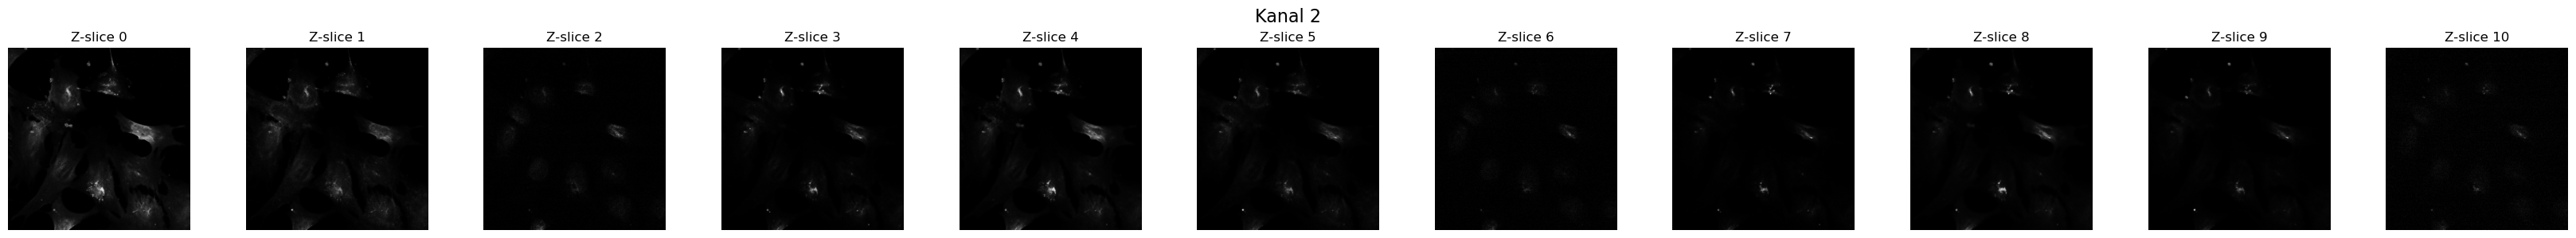

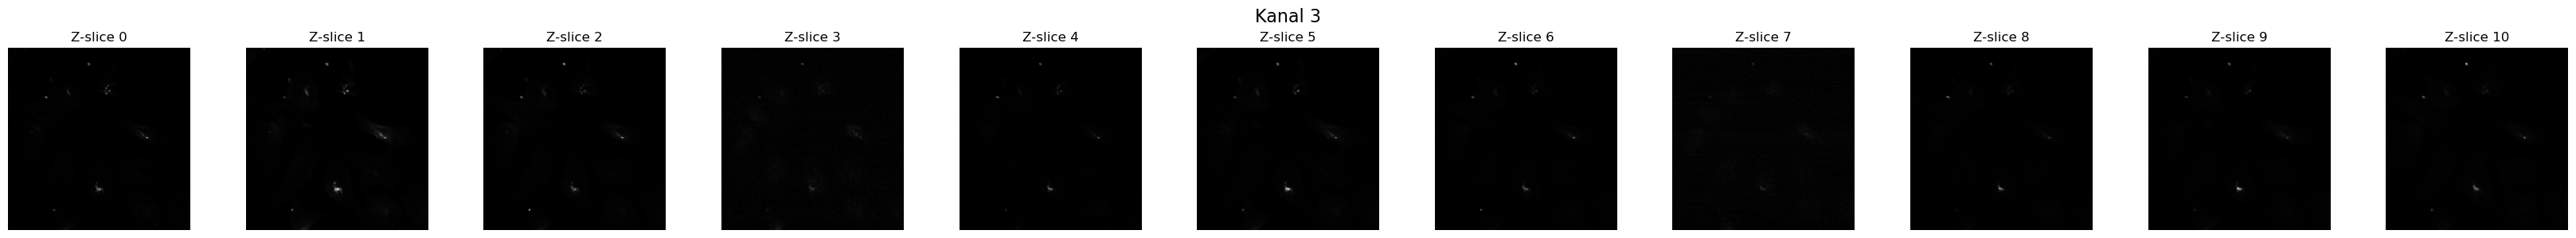

In [103]:
for c in range(img.dims.C):
    z_stack = img.get_image_data("ZYX", T=0, C=c)
    
    fig, axs = plt.subplots(1, img.dims.Z, figsize=(3 * img.dims.Z, 3))
    fig.suptitle(f"Kanal {c}", fontsize=16)

    for z in range(img.dims.Z):
        axs[z].imshow(z_stack[z], cmap="gray")
        axs[z].set_title(f"Z-slice {z}")
        axs[z].axis("off")

    plt.tight_layout()
    plt.show()

In [106]:

c2 = img.get_image_data("CZYX", T=0, C=0)  # Assuming channel 2 is C2

if c2.ndim == 4:
    c2 = np.squeeze(c2)  # otomatik olarak boyutu düşürür
    print("c2.shape:", c2.shape)



c2.shape: (11, 1024, 1024)


In [107]:
c2_2d = np.max(c2, axis=0)
print("c2_2d.shape:", c2_2d.shape)  # (1024, 1024) gibi olur


c2_2d.shape: (1024, 1024)


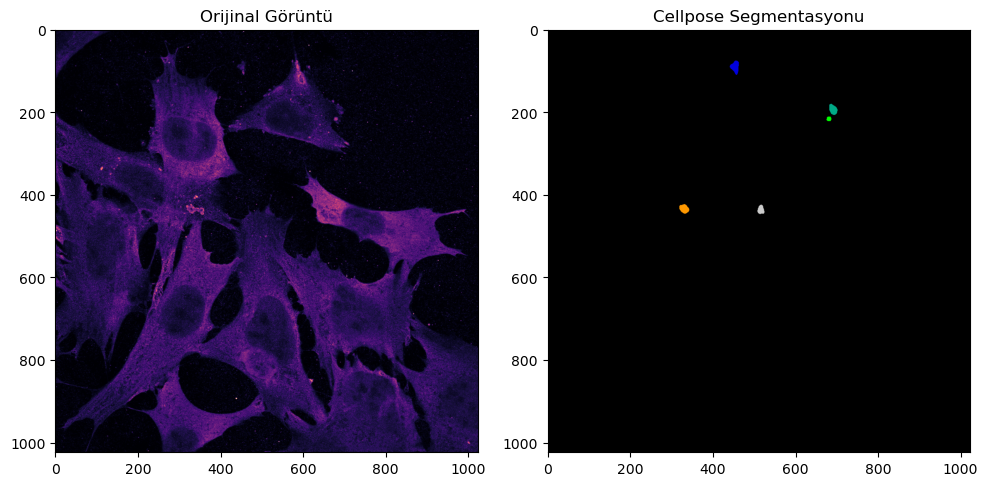

Bulunan hücre sayısı: 5


In [108]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import models

# --- 1. Görüntüyü yükle (örneğin c2_2d) ---
image = c2_2d  # Eğer 2D görüntü kullanıyorsan, c2_2d olmalı

# --- 2. Cellpose modelini başlat ---
model = models.Cellpose(gpu=False, model_type='cyto')  # `gpu=True` eğer GPU varsa

# --- 3. Segmentasyon işlemi ---
masks, flows, styles, diams = model.eval(image, diameter=None, channels=[0,0], do_3D=False)

# --- 4. Sonuçları görselleştir ---
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Orijinal görüntü
ax[0].imshow(image, cmap='magma')
ax[0].set_title("Orijinal Görüntü")

# Cellpose ile segmentasyon sonucu
ax[1].imshow(masks, cmap='nipy_spectral')
ax[1].set_title("Cellpose Segmentasyonu")

plt.tight_layout()
plt.show()

plt.imsave('cellpose_segmented_image.png', masks)

print(f"Bulunan hücre sayısı: {len(np.unique(masks)) - 1}")  # 0 boş arka planı saymamak için


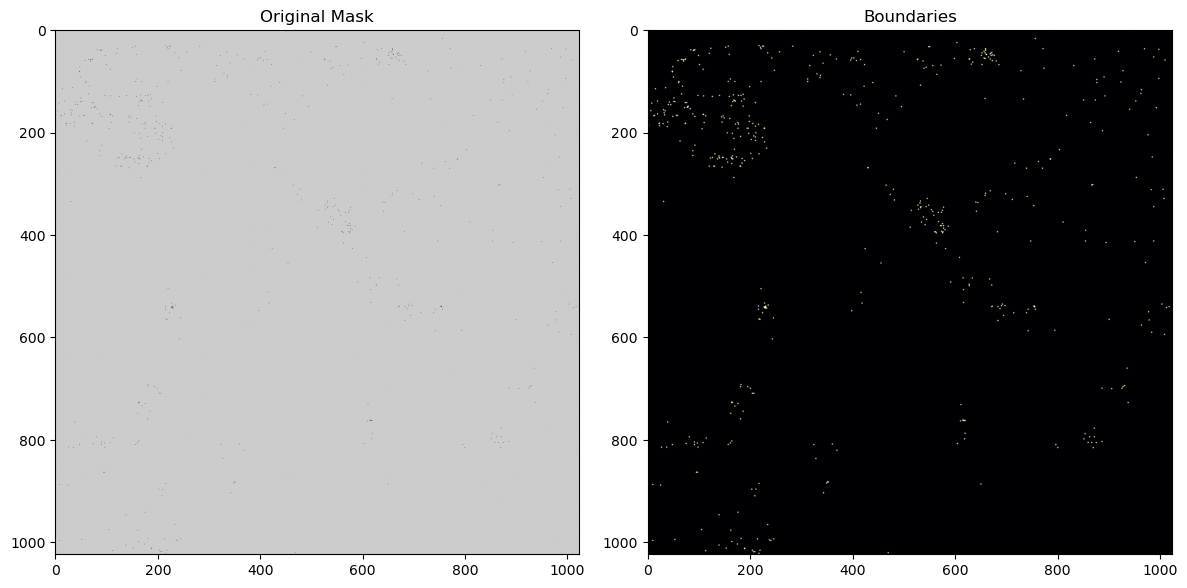

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import find_boundaries

# Assuming c2_2d is your segmented mask (make sure it's 2D or select a slice if 3D)
mask_2d = np.where(c2_2d > 0, 1, 0)  # Convert to binary mask

# Find the boundaries
boundaries = find_boundaries(mask_2d, mode='thick')  # 'thick' for visible boundaries

# Visualize the original mask and boundaries
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display original mask
ax[0].imshow(mask_2d, cmap='nipy_spectral')
ax[0].set_title("Original Mask")

# Display boundaries
ax[1].imshow(boundaries, cmap='magma')
ax[1].set_title("Boundaries")

plt.tight_layout()
plt.show()


In [110]:
from skimage.segmentation import find_boundaries

# Hücre içindeki aggregation maskesi
agg_mask_inside = clean_mask & cell_mask  # sadece hücre içi

# Etiketle
labeled_inside = measure.label(agg_mask_inside)
num_inside = labeled_inside.max()

# Hücre sınırları (yeşil çizgi için)
boundaries = find_boundaries(cell_mask, mode='outer')

# Görsel
plt.figure(figsize=(10, 10))
plt.imshow(max_proj, cmap='gray')

# Sarı aggregation overlay (sadece hücre içindekiler)
plt.imshow(agg_mask_inside, cmap=colors.ListedColormap(['none', 'yellow']), alpha=0.9)

# Hücre sınırını yeşil çiz
plt.imshow(boundaries, cmap=colors.ListedColormap(['none', 'lime']), alpha=1.0)

plt.title(f"Aggregations in the cells: {num_inside}", fontsize=18)
plt.axis('off')
plt.show()

print(f"Total aggregation: {num_inside}")


NameError: name 'clean_mask' is not defined